In [1]:
import geopandas
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd



# Time Series Data

##  Well Depth

AAA001: Apears to be bad data: most of pre 2019 +- MSL is way abouve well elevation

Text(0, 0.5, 'Water Level +/- MSL')

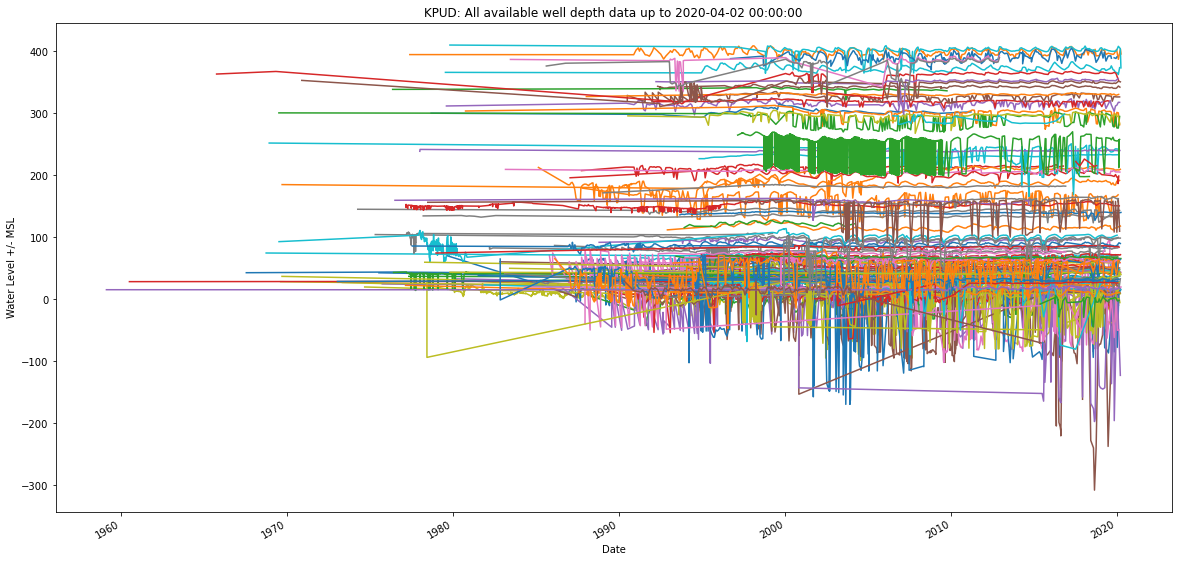

In [2]:

filename = "KPUD_Well_Depth_2020_04_05.csv"
well_depths=pd.read_csv(filename, index_col=0)
well_depths.index = pd.to_datetime(well_depths.Date)
well_depths  = well_depths.drop('Date', axis=1)

wells_in_df = well_depths['Well Name'].unique()
for i in range(len(wells_in_df)):
    well_mask = well_depths['Well Name']==wells_in_df[i]
    well_depths[well_mask]['Water Level +/- MSL'].astype(float).plot(figsize=(20,10))
plt.title('KPUD: All available well depth data up to {}'.format(well_depths.index.max()))
plt.ylabel('Water Level +/- MSL')

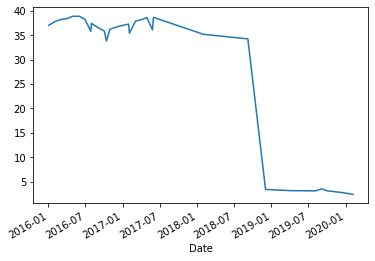

In [205]:
well_depths[well_depths['Location_Key'] == 'AAA001']['Water Level +/- MSL']['2016':].plot()

In [207]:
well_depths.rename(columns = {'Water Level +/- MSL':'Water Level +/- MSL (Feet)',
                             'Well Elevation':'Well Elevation (Feet)'})

Time AM-PM  Water Level +/- MSL (Feet)  Well Elevation (Feet)  \
Date                                                                            
1975-07-14  12:00:00    AM                       42.80                  13.00   
1990-11-14   8:55:00    AM                       35.16                  13.00   
1991-01-11   7:30:00    AM                       37.47                  13.00   
1991-03-27   7:40:00    AM                       37.47                  13.00   
1991-04-22   7:35:00    AM                       37.47                  13.00   
...              ...   ...                         ...                    ...   
2017-10-09  12:00:00    PM                      215.02                 286.78   
2018-01-17   1:30:00    PM                      226.22                 286.78   
2018-05-08   9:50:00    AM                      220.63                 286.78   
2018-08-13  12:00:00    AM                      214.42                 286.78   
2018-10-15  10:45:00    AM                      215.58                 286.78   

                                         Well Name Location_Key  
Date                                                             
1975-07-14  AAA001  KPUD KEYPORT PRODUCTION WELL 1       AAA001  
1990-11-14  AAA001  KPUD KEYPORT PRODUCTION WELL 1       AAA001  
1991-01-11  AAA001  KPUD KEYPORT PRODUCTION WELL 1       AAA001  
1991-03-27  AAA001  KPUD KEYPORT PRODUCTION WELL 1       AAA001  
1991-04-22  AAA001  KPUD KEYPORT PRODUCTION WELL 1       AAA001  
...                                            ...          ...  
2017-10-09      BHN761  KPUD PORT GAMBLE LOSS MW-1       BHN761  
2018-01-17      BHN761  KPUD PORT GAMBLE LOSS MW-1       BHN761  
2018-05-08      BHN761  KPUD PORT GAMBLE LOSS MW-1       BHN761  
2018-08-13      BHN761  KPUD PORT GAMBLE LOSS MW-1       BHN761  
2018-10-15      BHN761  KPUD PORT GAMBLE LOSS MW-1       BHN761  

[40112 rows x 6 columns]

In [208]:
well_depths.to_csv('Data/TimeSeries/Well_Depths.csv')

## River Discharge

Unnamed: 0  Avg Discharge (cfs)  Max Discharge (cfs)  \
Date                                                               
2019-10-01           0                 2.72                 3.54   
2019-10-02           1                 2.46                 3.25   
2019-10-03           2                 2.17                 2.46   
2019-10-04           3                 2.07                 2.71   
2019-10-05           4                 2.22                 2.97   

            Min Discharge (cfs)                         Station  
Date                                                             
2019-10-01                 1.77  AC  Anderson Creek - Bremerton  
2019-10-02                 1.77  AC  Anderson Creek - Bremerton  
2019-10-03                 1.77  AC  Anderson Creek - Bremerton  
2019-10-04                 1.35  AC  Anderson Creek - Bremerton  
2019-10-05                 1.77  AC  Anderson Creek - Bremerton

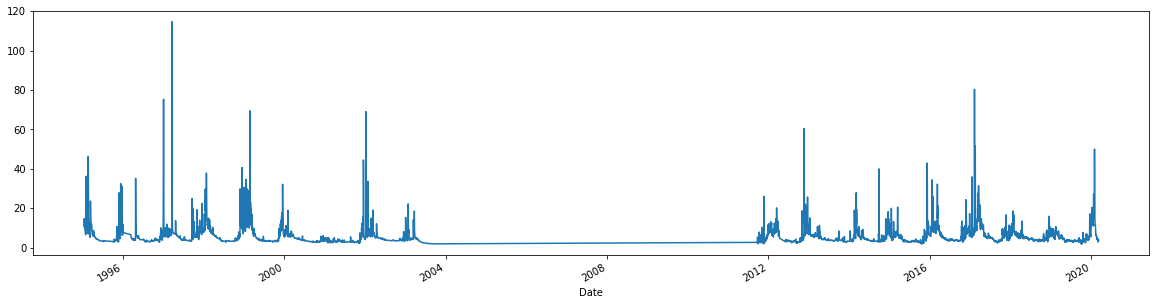

In [12]:
discharge = pd.read_csv('KPUD_2020_04_05.csv', index_col='Date')
discharge.index = pd.to_datetime(discharge.index)

discharge_stations = discharge['Station'].unique()
selected_station = discharge[discharge['Station']==discharge_stations[0]]
selected_station['Avg Discharge (cfs)'].plot(figsize = (20,5))
discharge.head()

In [15]:
discharge['Location_Key'] = discharge['Station'].apply(lambda x: x[:2])
discharge.to_csv('Data/TimeSeries/Daily_Discharge.csv')

In [16]:
discharge = pd.read_csv('Data/TimeSeries/Daily_Discharge.csv', index_col = 0)

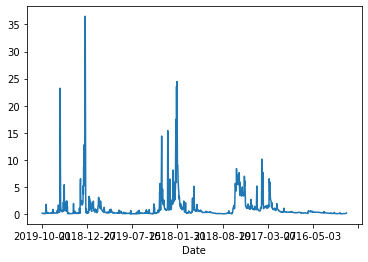

In [18]:
discharge[discharge['Location_Key'] == 'IL']['Avg Discharge (cfs)'].plot()

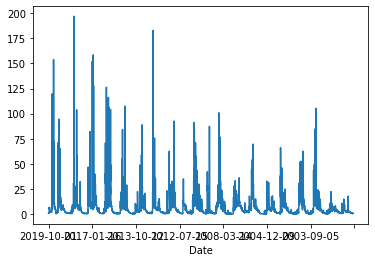

In [28]:
data = discharge[discharge['Location_Key'] == 'GO']['Avg Discharge (cfs)']
data.plot()

In [30]:
import plotly.graph_objs as go
go.Scatter(
        x=data.index,
        y=data.values,
        line = dict(color = '#7F7F7F'),
        opacity = 0.8)

Scatter({
    'line': {'color': '#7F7F7F'},
    'opacity': 0.8,
    'x': array(['2019-10-01', '2019-10-02', '2019-10-03', ..., '2000-09-28',
                '2000-09-29', '2000-09-30'], dtype=object),
    'y': array([1.  , 1.1 , 1.28, ..., 0.49, 0.39, 0.74])
})

In [36]:
data = data.sort_index()

In [37]:
import plotly.express as px
fig = px.line(data, x=data.index, y=data.values)

In [38]:
fig.show()

## RainFall

In [42]:
rain = pd.read_csv('Data/Ingestion/KPUD_Rain_2020_05_28.csv', index_col= 0)

In [53]:
rain['Location_Key'] = rain['Station Name'].apply(lambda x: x[:2])

In [60]:
rain['Station Name'] = rain['Station Name'].apply(lambda x: x[4:].split('--')[0])

In [64]:
rain.head()

Rain(inches)                           Station Name Location_Key
Date                                                                        
2020-05-28          0.00  Kitsap Public Utility District Office           01
2020-05-27          0.00  Kitsap Public Utility District Office           01
2020-05-26          0.09  Kitsap Public Utility District Office           01
2020-05-25          0.17  Kitsap Public Utility District Office           01
2020-05-24          0.00  Kitsap Public Utility District Office           01

In [67]:
rain['Station Name'][0]

'Kitsap Public Utility District Office'

In [63]:
rain.to_csv('Data/TimeSeries/Daily_Rainfall.csv')

# Location Data

##  Wells

In [7]:
import numpy as np

well_meta_data = pd.read_csv('well_meta_data.csv', index_col =0)
well_meta_data['lat'] = well_meta_data.lat.astype(float)
well_meta_data['lon'] = well_meta_data.lon.astype(float) * -1
meta_cols = ['well_tag_nr','well_depth_qt','well_diameter_qt','well_owner_nm','lat','lon']
kitsap_well_meta_data = well_meta_data[well_meta_data['county_nm']=='Kitsap'][meta_cols]
kitsap_well_meta_data = kitsap_well_meta_data.rename(columns={'well_tag_nr':'Location_Key',
                                      'well_depth_qt':'Depth',
                                      'well_diameter_qt':'Diameter',
                                     'well_owner_nm': 'Owner'})

kitsap_well_meta_data = kitsap_well_meta_data.drop_duplicates(subset='Location_Key', keep='last')



KPUD_locations = pd.read_csv('KPUD_Locations.csv', index_col =0)

KPUD_locations_wells = KPUD_locations[KPUD_locations['Location_Type'] == 'Well']
KPUD_locations_wells = KPUD_locations_wells.rename(columns={'Lat':'KPUD_Lat','Lon':'KPUD_Lon'})


merged_well_data  = KPUD_locations_wells.merge(kitsap_well_meta_data, left_on = 'Location_Key', right_on = 'Location_Key', how='outer')
missing_KPUD_loc_data = merged_well_data['KPUD_Lat'].isnull() & ~merged_well_data['lat'].isnull()

merged_well_data['Golden_Lat'] = merged_well_data['KPUD_Lat']
merged_well_data['Golden_Lon'] =  merged_well_data['KPUD_Lon']

merged_well_data.loc[missing_KPUD_loc_data,'Golden_Lat'] = merged_well_data.loc[missing_KPUD_loc_data,'lat']
merged_well_data.loc[missing_KPUD_loc_data,'Golden_Lon'] = merged_well_data.loc[missing_KPUD_loc_data,'lon']

cols = ['Location_Key','Location_Type','Depth', 'Diameter', 'Owner','Golden_Lat', 'Golden_Lon']
well_location_data = merged_well_data[cols].copy()
well_location_data.loc[:,'Location_Type'] = 'Well'
well_location_data = well_location_data.rename(columns={'Golden_Lat':'Lat','Golden_Lon':'Lon'})
well_location_data.to_csv('Data/Locations/Well_Location_Data.csv')

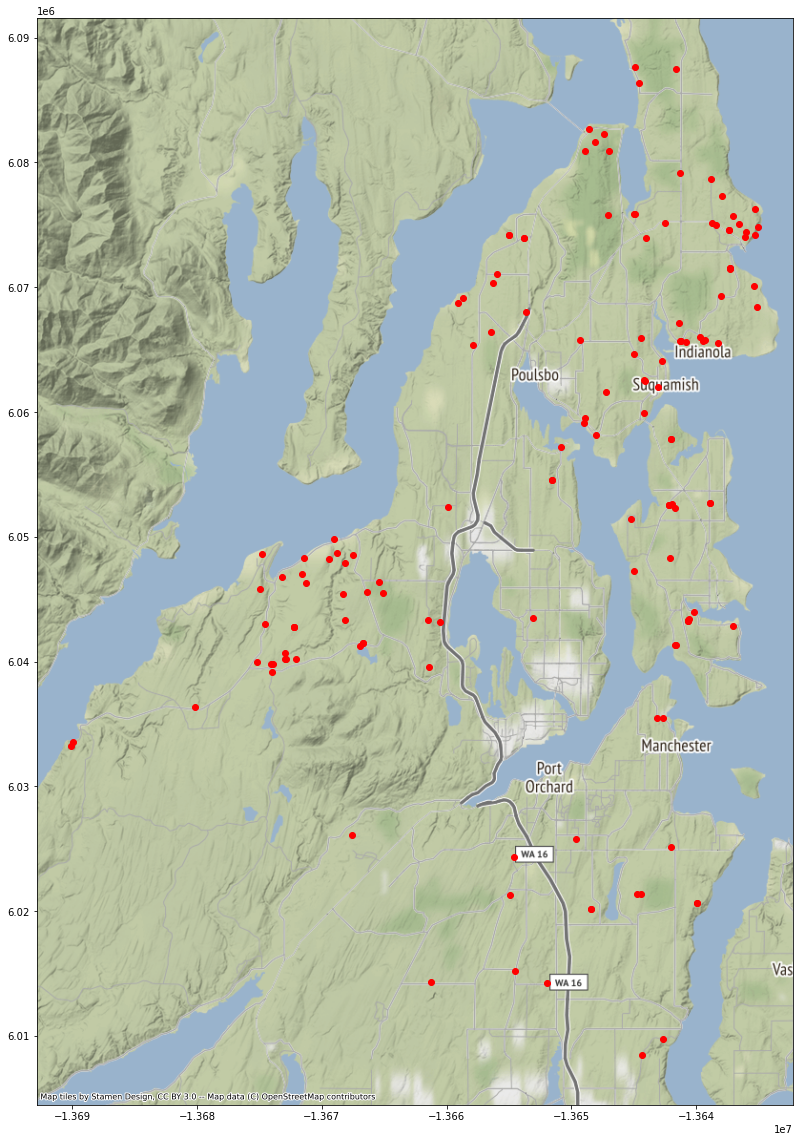

In [8]:
gdf = geopandas.GeoDataFrame(well_location_data, geometry=geopandas.points_from_xy(well_location_data.Lon, well_location_data.Lat))
country = geopandas.read_file("gz_2010_us_040_00_5m.json")
gdf.crs = {'init' :'epsg:4326'}
gdf = gdf.to_crs(epsg=3857)


ax = gdf.plot(color='red',figsize=(20,20))
ctx.add_basemap(ax)

## Discharge Stations

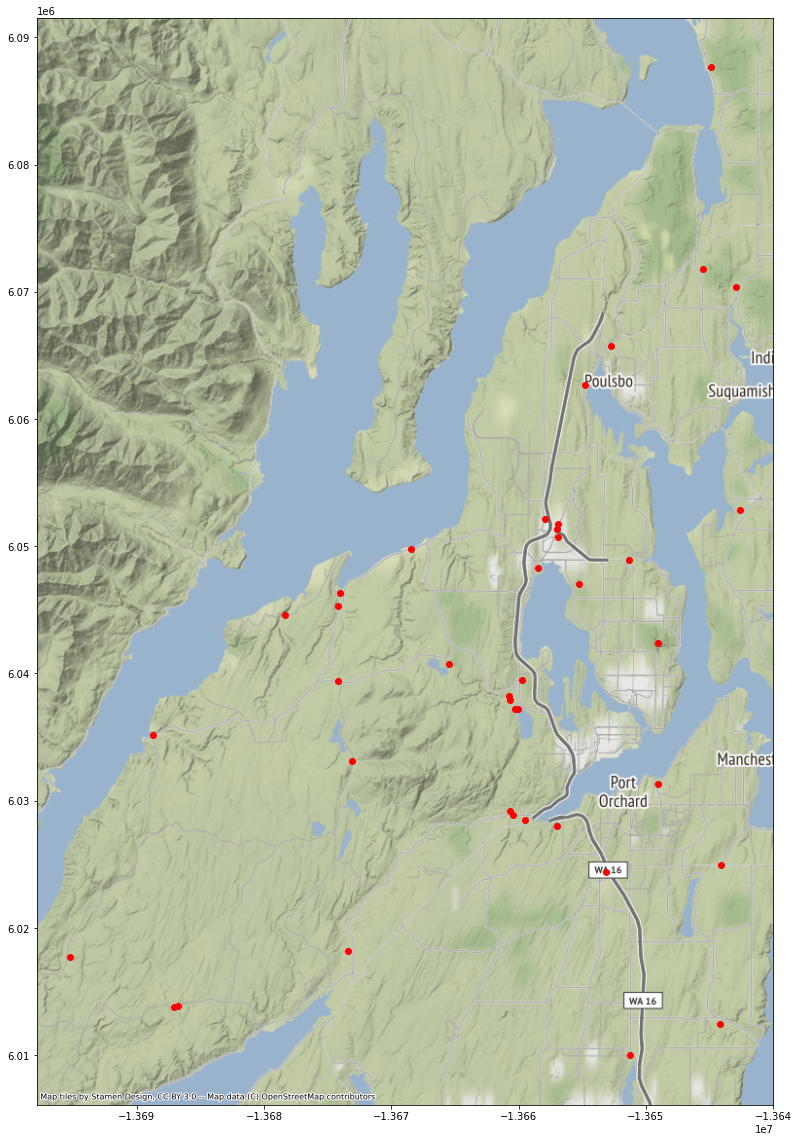

In [9]:
KPUD_locations = pd.read_csv('KPUD_Locations.csv', index_col =0)

KPUD_Locations_DisCh = KPUD_locations[KPUD_locations['Location_Type'] == 'Discharge Station']
gdf = geopandas.GeoDataFrame(KPUD_Locations_DisCh, geometry=geopandas.points_from_xy(KPUD_Locations_DisCh.Lon, KPUD_Locations_DisCh.Lat))
country = geopandas.read_file("gz_2010_us_040_00_5m.json")
gdf.crs = {'init' :'epsg:4326'}
gdf = gdf.to_crs(epsg=3857)


ax = gdf.plot(color='red',figsize=(20,20))
ctx.add_basemap(ax)
KPUD_Locations_DisCh[['Name', 'Lat', 'Lon','Location_Key','Location_Type']].to_csv('Data/Locations/Discharge_Location_Data.csv')




In [192]:
KPUD_Locations_DisCh

# Rain Gauge Locations

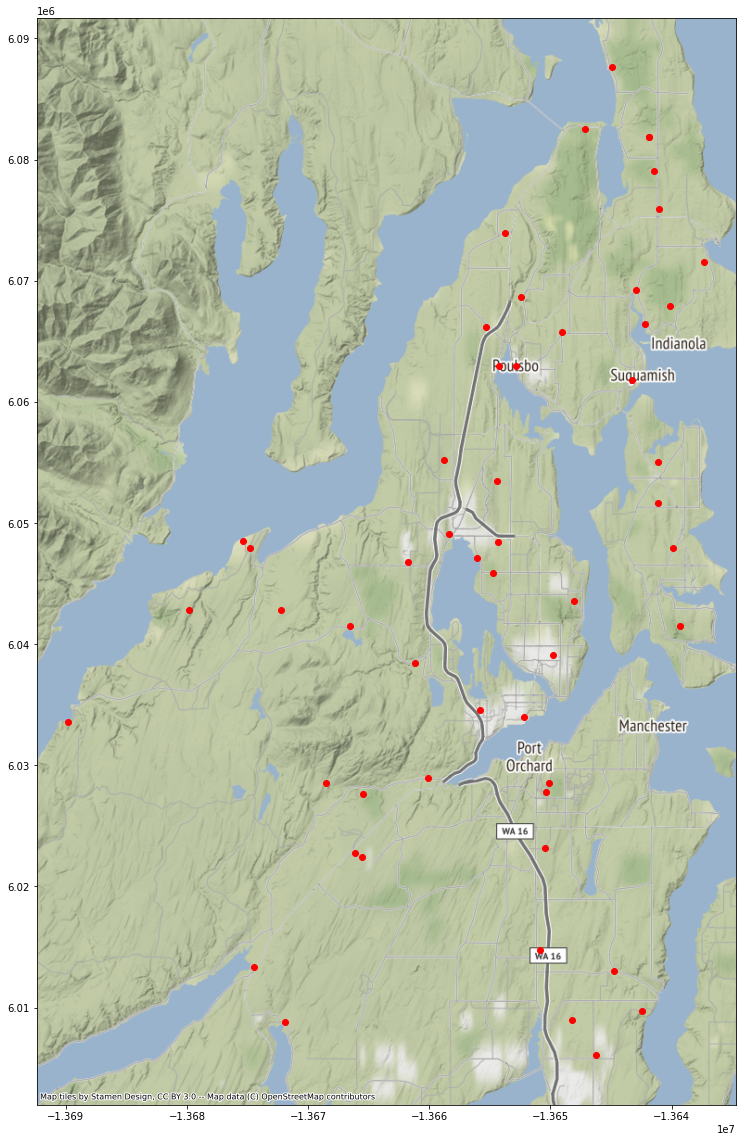

In [218]:
KPUD_locations = pd.read_csv('KPUD_Locations.csv', index_col =0)

KPUD_Locations_RainG = KPUD_locations[KPUD_locations['Location_Type'] == 'Rain Gauge']
gdf = geopandas.GeoDataFrame(KPUD_Locations_RainG, geometry=geopandas.points_from_xy(KPUD_Locations_RainG.Lon, KPUD_Locations_RainG.Lat))
country = geopandas.read_file("gz_2010_us_040_00_5m.json")
gdf.crs = {'init' :'epsg:4326'}
gdf = gdf.to_crs(epsg=3857)


ax = gdf.plot(color='red',figsize=(20,20))
ctx.add_basemap(ax)
KPUD_Locations_RainG[['Name', 'Lat', 'Lon','Location_Key','Location_Type']].to_csv('Data/Locations/Rain_Guage_Location_Data.csv')

In [45]:
pd.read_csv('Data/Locations/Rain_Guage_Location_Data.csv')

Unnamed: 0                                               Name        Lat  \
0          182                                     01--Kitsap PUD  47.755115   
1          183                         03--Indianola - Miller Bay  47.756389   
2          184         04--City of Poulsbo - Big Valley Well Site  47.770000   
3          185                         05--Bloedel Reserve - Shop  47.687778   
4          186                 06--Bremerton National Airport-Old  47.490000   
5          187                            08--BWU - Olympus Drive  47.591389   
6          188                          09--BREMERTON, WASHINGTON  47.560000   
7          189                              10--Fish Pro - Burley  47.443600   
8          190                      12--Sakai Intermediate School  47.644444   
9          191                         13--Coulter Creek Hatchery  47.407500   
10         192                              15--Poulsbo - Private  47.735556   
11         193                                16--SWD - Dawn Park  47.688611   
12         194                           18--BWU - Gorst @ Domsea  47.529800   
13         195                         22--Grovers Creek Hatchery  47.773333   
14         196                                      24--Hansville  47.884366   
15         197                               25--Holly Beach Club  47.557778   
16         198                              26--Illahee - Private  47.618333   
17         199                         27--Port Orchard - Private  47.527222   
18         200                28---Port of Kingston - Port Office  47.787157   
19         201                            31--BWU - McKenna Falls  47.527222   
20         202                         32--Meadowmeer Golf Course  47.666944   
21         203                               34--Olalla - Private  47.432778   
22         204                                    35--Port Gamble  47.853344   
23         205                    36--Poulsbo Public Works-Office  47.735638   
24         206              37--Scenic Beach State Park @ Seabeck  47.644444   
25         207                              38--Seabeck - Private  47.648300   
26         208                               39--SWD - Wixon Site  47.637500   
27         209                           40--Stavis Bay - Private  47.613611   
28         210                             41--Tracyton - Private  47.639444   
29         211                    42--BWU - Twin Lakes @ Well #20  47.521667   
30         212                       46--Hansville Road - Private  47.813611   
31         213                    49--West Sound Utility District  47.522778   
32         214                       50--WA Water Company - Purdy  47.390556   
33         215                   51--SWD - Nels Nelson @ East End  47.647500   
34         216                52--SWD - Crista Camp @ Island Lake  47.678333   
35         217  53--Gala Pines Weather Station-Poulsbo (Click ...  47.752222   
36         218                            56--Indianola - Private  47.765278   
37         219                     59---Edgewater Industrial Park  47.801606   
38         220         61--BA - SSWM (Bremerton National Airport)  47.491944   
39         221              62--SW - SSWM (Silverdale-Wixon Site)  47.651520   
40         222                       63--AP - SSWM (Airport Park)  47.605833   
41         223                                64--Purdy - Private  47.408333   
42         224                                  65--Theler Center  47.434722   
43         225                                     66--Sunny Cove  47.413056   
44         226                                     67--Bridletree  47.613446   
45         227                       68--Hansville Road - Private  47.832560   
46         228  70--Kitsap County Fairgrounds Pavilion - Breme...  47.632320   
47         229                71--Kitsap County Central Road Shed  47.587327   
48         230                  72--Kitsap County South Road Shed  47.494538   
49  

# Trial Merges

In [172]:
discharge = pd.read_csv('KPUD_2020_04_05.csv', index_col='Date')
discharge.index = pd.to_datetime(discharge.index)


filename = "KPUD_Well_Depth_2020_04_05.csv"
well_depths=pd.read_csv(filename, index_col=0)
well_depths.index = pd.to_datetime(well_depths.Date)
well_depths  = well_depths.drop('Date', axis=1)

discharge['Location_Key'] = discharge['Station'].apply(lambda x: x[:2])
well_depths['Location_Key'] = well_depths['Well Name'].apply(lambda x: x[:6])
well_depths['Location_Key'] = well_depths['Location_Key'].str.upper()



well_depths.merge(well_location_data, left_on = 'Location_Key', right_on = 'Location_Key', how='left')

Time AM-PM  Water Level +/- MSL  Well Elevation  \
0      12:00:00    AM                42.80           13.00   
1       8:55:00    AM                35.16           13.00   
2       7:30:00    AM                37.47           13.00   
3       7:40:00    AM                37.47           13.00   
4       7:35:00    AM                37.47           13.00   
...         ...   ...                  ...             ...   
40394  12:00:00    PM               215.02          286.78   
40395   1:30:00    PM               226.22          286.78   
40396   9:50:00    AM               220.63          286.78   
40397  12:00:00    AM               214.42          286.78   
40398  10:45:00    AM               215.58          286.78   

                                    Well Name Location_Key  Depth  Diameter  \
0      AAA001  KPUD KEYPORT PRODUCTION WELL 1       AAA001  746.0      16.0   
1      AAA001  KPUD KEYPORT PRODUCTION WELL 1       AAA001  746.0      16.0   
2      AAA001  KPUD KEYPORT PRODUCTION WELL 1       AAA001  746.0      16.0   
3      AAA001  KPUD KEYPORT PRODUCTION WELL 1       AAA001  746.0      16.0   
4      AAA001  KPUD KEYPORT PRODUCTION WELL 1       AAA001  746.0      16.0   
...                                       ...          ...    ...       ...   
40394      BHN761  KPUD PORT GAMBLE LOSS MW-1       BHN761   90.0       6.0   
40395      BHN761  KPUD PORT GAMBLE LOSS MW-1       BHN761   90.0       6.0   
40396      BHN761  KPUD PORT GAMBLE LOSS MW-1       BHN761   90.0       6.0   
40397      BHN761  KPUD PORT GAMBLE LOSS MW-1       BHN761   90.0       6.0   
40398      BHN761  KPUD PORT GAMBLE LOSS MW-1       BHN761   90.0       6.0   

                                     Owner        Lat         Lon  
0                   KITSAP COUNTY P U D #1  47.700758 -122.627431  
1                   KITSAP COUNTY P U D #1  47.700758 -122.627431  
2                   KITSAP COUNTY P U D #1  47.700758 -122.627431  
3                   KITSAP COUNTY P U D #1  47.700758 -122.627431  
4                   KITSAP COUNTY P U D #1  47.700758 -122.627431  
...                                    ...        ...         ...  
40394  POPE RESOUORCES | GOLDER ASSOCIATES  47.843978 -122.592942  
40395  POPE RESOUORCES | GOLDER ASSOCIATES  47.843978 -122.592942  
40396  POPE RESOUORCES | GOLDER ASSOCIATES  47.843978 -122.592942  
40397  POPE RESOUORCES | GOLDER ASSOCIATES  47.843978 -122.592942  
40398  POPE RESOUORCES | GOLDER ASSOCIATES  47.843978 -122.592942  

[40399 rows x 11 columns]

In [168]:
KPUD_locations.rename(columns={'Lat':'KPUD_Lat','Lon':'KPUD_lon'})

Name   KPUD_Lat    KPUD_lon  \
0                      BB--Big Beef Creek near Seabeck  47.655599 -122.785862   
1             BU--Upper Big Beef Creek near Camp Union  47.593100 -122.837000   
2                            CC--Clear Creek Main Stem  47.661483 -122.682049   
3                    CCSW--Clear Main @ Silverdale Way  47.665075 -122.682536   
4                        CT--Chico Trib. @ Taylor Road  47.586061 -122.716311   
..                                                 ...        ...         ...   
233                                           76--RAGF  47.849670 -122.547160   
234                              77--BWU – Oyster Bay   47.563677 -122.672337   
235                       78--South Bainbridge Island   47.605667 -122.523639   
236    Purdy Road Shop (Pierce County Weather Station)  47.378299 -122.618909   
237  Longbranch Marina (Pierce County Weather Station)  47.209523 -122.755025   

    Location_Key      Location_Type  
0             BB  Discharge Station  
1             BU  Discharge Station  
2             CC  Discharge Station  
3             CC  Discharge Station  
4             CT  Discharge Station  
..           ...                ...  
233           76         Rain Gauge  
234           77         Rain Gauge  
235           78         Rain Gauge  
236          NaN                NaN  
237          NaN                NaN  

[238 rows x 5 columns]

In [25]:




well_meta_data['Site_ID'] = well_meta_data['well_tag_nr'].str.upper()
well_cols = list(well_meta_data.columns.values)
well_cols.remove('geometry')

kitsap_meta_data = well_meta_data[well_meta_data['county_nm']=='Kitsap'][well_cols]

well_depths['Date'] = well_depths.index.values
well_master = well_depths.merge(kitsap_meta_data, left_on = 'Site_ID', right_on= 'Site_ID', how ='left')

well_master = well_master.set_index('Date')


# Try some spatial models

## Basic plot of well depths by month

In [ ]:
regrouped = well_depths.groupby('Site_ID').resample('M').max()

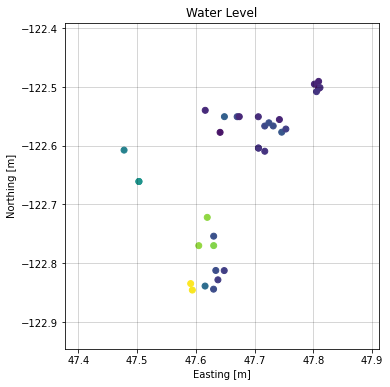

In [51]:


site_ids = well_depths['Site_ID'].unique()
agrigated  = regrouped.loc[site_ids,'Water Level +/- MSL'].reset_index()
cols =['Site_ID', 'lat', 'lon']

agrigated = agrigated.merge(kitsap_meta_data, left_on = 'Site_ID', right_on= 'Site_ID', how ='left')
month_mask = agrigated['Date'].apply(lambda x: x.month) ==6
year_mask = agrigated['Date'].apply(lambda x: x.year) == 2019
find_month = month_mask & year_mask
selected = agrigated[find_month].dropna(subset=['lat','lon','Water Level +/- MSL'])
extent = x_extent = x_min, x_max, y_min, y_max = [selected.lat.min()-0.1, selected.lat.max()+0.1,
                                                  selected.lon.min()-0.1, selected.lon.max()+0.1]
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(selected.lat, selected.lon, c=selected['Water Level +/- MSL'])
ax.set_aspect(1)
ax.set_xlim(*extent[:2])
ax.set_ylim(*extent[2:])
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
ax.set_title('Water Level')
ax.grid(c='k', alpha=0.2)


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,WhiteKernel
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
import numpy as np
from scipy.interpolate import griddata


## Basic Interpolation Methods

Text(0.5, 1.0, 'Cubic')

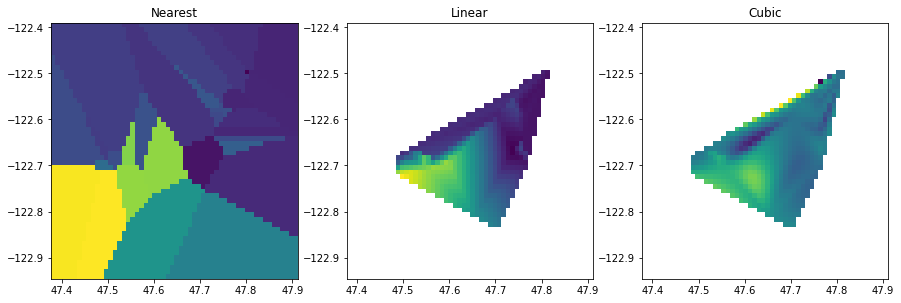

In [52]:
grid_x, grid_y = np.mgrid[x_min:x_max:0.01, y_min:y_max:0.01]

X = selected[['lat','lon']].values
y = selected['Water Level +/- MSL'].values

grid_z0 = griddata(X, y, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(X, y, (grid_x, grid_y), method='linear')
grid_z2 = griddata(X, y, (grid_x, grid_y), method='cubic')

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

ax = axs[0]
ax.imshow(grid_z0, origin='lower', extent=extent)
#ax.scatter(X, y, s=2, c='w')
ax.set_title('Nearest')

ax = axs[1]
ax.imshow(grid_z1, origin='lower', extent=extent)
#ax.scatter(X, y, s=2, c='w')
ax.set_title('Linear')

ax = axs[2]
ax.imshow(grid_z2, origin='lower', extent=extent)
#ax.scatter(X, y, s=2, c='w')
ax.set_title('Cubic')

## Kriging: AKA GaussianRegressor

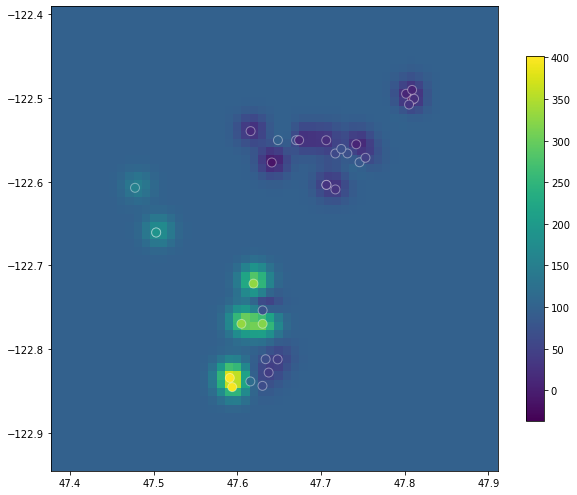

In [53]:
kernel = RBF(length_scale=1050)
model = GaussianProcessRegressor(normalize_y=True,
                              alpha=0.101,  # Larger values imply more noise in the input data.
                              kernel=kernel)

X = selected[['lat','lon']].values
y= selected['Water Level +/- MSL'].values
model.fit(X,y)
X_grid = np.stack([grid_x.ravel(), grid_y.ravel()]).T
y_grid = model.predict(X_grid).reshape(grid_x.shape)

mi = np.min(np.hstack([y_grid.ravel(), selected['Water Level +/- MSL']]))
ma = np.max(np.hstack([y_grid.ravel(), selected['Water Level +/- MSL']]))

# Plot it all.
plt.figure(figsize=(10,10))
im = plt.imshow(y_grid.T, origin='lower', extent=extent, vmin=mi, vmax=ma)
pts = plt.scatter(selected.lat, selected.lon, c=selected['Water Level +/- MSL'], s=80, edgecolor='#ffffff66', vmin=mi, vmax=ma)
plt.colorbar(im, shrink=0.67)
plt.show()

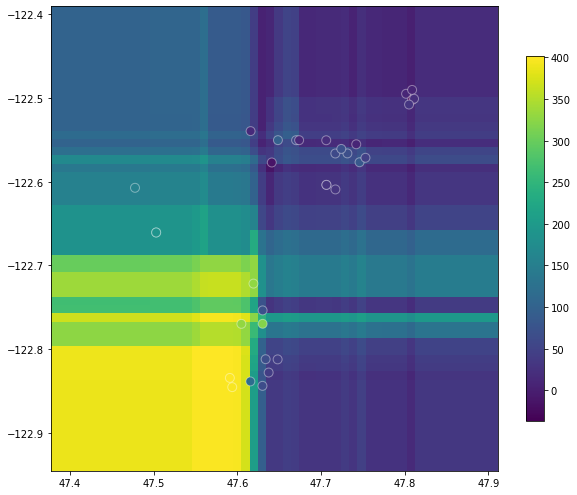

In [63]:
model = GradientBoostingRegressor(n_estimators = 200)

X = selected[['lat','lon']].values
y= selected['Water Level +/- MSL'].values
model.fit(X,y)
X_grid = np.stack([grid_x.ravel(), grid_y.ravel()]).T
y_grid = model.predict(X_grid).reshape(grid_x.shape)

mi = np.min(np.hstack([y_grid.ravel(), selected['Water Level +/- MSL']]))
ma = np.max(np.hstack([y_grid.ravel(), selected['Water Level +/- MSL']]))

# Plot it all.
plt.figure(figsize=(10,10))
im = plt.imshow(y_grid.T, origin='lower', extent=extent, vmin=mi, vmax=ma)
pts = plt.scatter(selected.lat, selected.lon, c=selected['Water Level +/- MSL'], s=80, edgecolor='#ffffff66', vmin=mi, vmax=ma)
plt.colorbar(im, shrink=0.67)
plt.show()

In [33]:
agrigated = agrigated.merge(kitsap_meta_data, left_on = 'Site_ID', right_on= 'Site_ID', how ='left')

In [36]:
month_mask = agrigated['Date'].apply(lambda x: x.month) ==6
year_mask = agrigated['Date'].apply(lambda x: x.year) == 2019
find_month = month_mask & year_mask
selected = agrigated[find_month]

In [37]:
selected

Site_ID       Date  Water Level +/- MSL  well_log_id well_tag_nr  \
527    AAA001 2019-06-30                  NaN      66892.0      AAA001   
906    AAA002 2019-06-30                  NaN      66895.0      AAA002   
2746   AAA011 2019-06-30                  NaN          NaN         NaN   
3117   AAA012 2019-06-30                  NaN      66904.0      AAA012   
4351   AAA015 2019-06-30                62.44          NaN         NaN   
...       ...        ...                  ...          ...         ...   
59514  AFC506 2019-06-30                  NaN     248192.0      AFC506   
59714  AHB466 2019-06-30                  NaN     368026.0      AHB466   
59995  ALK129 2019-06-30                31.11     549360.0      ALK129   
60158  ALK301 2019-06-30                  NaN     727423.0      ALK301   
60216  APP319 2019-06-30                -3.63          NaN         NaN   

      nit_id_nr  well_depth_qt  well_diameter_qt              well_owner_nm  \
527         NaN          746.0              16.0     KITSAP COUNTY P U D #1   
906         NaN         1032.0              20.0       KITSAP COUNTY P.U.D.   
2746        NaN            NaN               NaN                        NaN   
3117        NaN          805.0              10.0       KITSAP COUNTY PUD #1   
4351        NaN            NaN               NaN                        NaN   
...         ...            ...               ...                        ...   
59514   W121592          451.0              12.0  PUD NO 1 OF KITSAP COUNTY   
59714   W168675           71.0               6.0                STEVE VELIE   
59995   W238916          440.0              16.0            KITSAP CO PUD 1   
60158   W238906          743.0              12.0                 KITSAP PUD   
60216       NaN            NaN               NaN                        NaN   

       township_nr  ...  qtr_qtr_section_cd well_comp_dt  county_nm  \
527           26.0  ...                  NW   07/03/1975     Kitsap   
906           25.0  ...                  NW          NaN     Kitsap   
2746           NaN  ...                 NaN          NaN        NaN   
3117          27.0  ...                  NW   04/26/1989     Kitsap   
4351           NaN  ...                 NaN          NaN        NaN   
...            ...  ...                 ...          ...        ...   
59514         27.0  ...                  NE   12/13/1999     Kitsap   
59714         27.0  ...                  NW   05/27/2003     Kitsap   
59995         27.0  ...                  SW   04/04/2007     Kitsap   
60158         25.0  ...                  NW   09/08/2006     Kitsap   
60216          NaN  ...                 NaN          NaN        NaN   

      well_type_cd well_log_recv_dt      tax_parcel_nr ST_PLANE_XCOORD_NR  \
527              W              NaN                NaN          1117063.0   
906              W       10/24/1988                NaN          1114221.0   
2746           NaN              NaN                NaN                NaN   
3117             W       05/05/1989                NaN          1146649.0   
4351           NaN              NaN                NaN                NaN   
...            ...              ...                ...                ...   
59514            W       04/07/2000                NaN          1111480.0   
59714            W       08/11/2003  262702-2-033-2000          1144330.0   
59995            W       09/22/2008  262702-1-046-2007          1146949.0   
60158            W       06/10/2011                NaN          1068774.0   
60216          NaN              NaN                NaN                NaN   

      ST_PLANE_YCOORD_NR        lat         lon  
527             869911.0  47.699297 -122.625306  
906             864701.0  47.684811 -122.636268  
2746                 NaN        NaN         NaN  
3117            900439.0  47.785072 -122.508368  
4351                 NaN        NaN         NaN  
...                  ...        ...         ...  
59514           906938.0  47.800337 -122